In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
from PIL import Image
from os import listdir
import numpy as np
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
print(os.listdir('brain_tumor_dataset'))

['no', 'yes']


In [3]:
# Load & Display the Images
norm_image = Image.open('C:/Users/INTEL/Downloads/MachineLearning-master/Datasets/brain_tumor_dataset/no/1 no.jpeg')
pneumonia_image = Image.open('C:/Users/INTEL/Downloads/MachineLearning-master/Datasets/brain_tumor_dataset/yes/Y1.jpg')

Text(0.5, 1.0, 'Normal MRI')

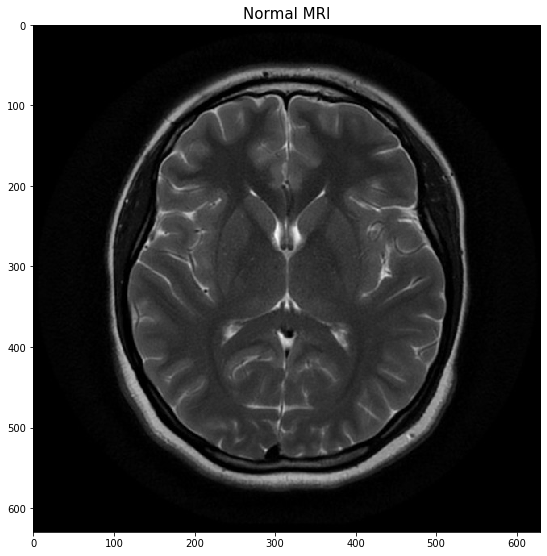

In [4]:
# Let's plot these images 
#Let's plot these x-ray images
fig = plt.figure(figsize=(20,10))
# 1,2,1 ==> 1 row, 2 columns, 1st Image
a1 = fig.add_subplot(1, 2, 1) 
img_plot = plt.imshow(norm_image , cmap= 'gray')
a1.set_title ('Normal MRI', fontsize = 15)


Text(0.5, 1.0, 'Brain Tumor MRI')

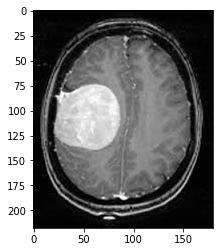

In [5]:
# 1,2,2 ==> 1 row, 2 columns, 2nd Image
a1 = fig.add_subplot(1, 2, 2)
img_plot = plt.imshow(pneumonia_image , cmap= 'gray')
a1.set_title ('Brain Tumor MRI', fontsize = 15)

In [6]:
yes = os.listdir('C:/Users/INTEL/Downloads/MachineLearning-master/Datasets/brain_tumor_dataset/yes/')
no = os.listdir('C:/Users/INTEL/Downloads/MachineLearning-master/Datasets/brain_tumor_dataset/no/')


In [7]:
data = np.concatenate([yes,no]) 

In [8]:
# change the target name to 1 & 0
target_x = np.full(len(yes), 1)
target_y = np.full(len(no), 0)

In [9]:
data_target=np.concatenate([target_x,target_y])

In [10]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
X_data = []
for file in yes:
  img = cv2.imread('C:/Users/INTEL/Downloads/MachineLearning-master/Datasets/brain_tumor_dataset/yes/'+file)
  mri = cv2.resize(img, (32, 32))
  # cv2 - B,G,R but computer understands R,G,B format
  (b, g, r) = cv2.split(mri) 
  img=cv2.merge([r,g,b])
  X_data.append(img)

In [12]:
for file in no:
  img = cv2.imread('C:/Users/INTEL/Downloads/MachineLearning-master/Datasets/brain_tumor_dataset/no/'+file)
  mri = cv2.resize(img, (32, 32))
  # cv2 - B,G,R but computer understands R,G,B format
  (b, g, r) = cv2.split(mri) 
  img=cv2.merge([r,g,b])
  X_data.append(img)

In [13]:
X = np.squeeze(X_data)

In [14]:
X.shape

(253, 32, 32, 3)

In [15]:
X = X.astype('float32')
X /= 255

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, data_target, test_size = 0.1, random_state = 1)

In [17]:
x_train.shape

(227, 32, 32, 3)

In [18]:
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size = 0.15, random_state = 1)

In [19]:
x_train2.shape

(192, 32, 32, 3)

In [22]:
def build_model():
  # Input Layer
  model = Sequential()
  model.add(Conv2D(filters=16, kernel_size=9, activation='relu', padding='same', input_shape = (32, 32, 3)))
  model.add(MaxPooling2D(pool_size=(2)))
  model.add(Dropout(0.45))

  # ConvNets - II
  model.add(Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.25))
  
  # ConvNets - III
  model.add(Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.25))
  
  # Faltten Matrix
  model.add(Flatten())

  # FC Layer 
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.15))
  # Output Layer
  model.add(Dense(1, activation='sigmoid'))
  # Take a look at the model summary
  
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model 

In [23]:
model = build_model()

In [24]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        3904      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 16)        20752     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 36)         

In [25]:
history = model.fit(x_train2,
         y_train2,
         batch_size=128,
         epochs=150,
         validation_data=(x_val, y_val))


Train on 192 samples, validate on 35 samples
Epoch 1/150
192/192 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4844 - val_loss: 0.6648 - val_accuracy: 0.5714
Epoch 2/150
192/192 [==============================] - 0s 141us/step - loss: 0.6359 - accuracy: 0.6354 - val_loss: 0.6738 - val_accuracy: 0.5714
Epoch 3/150
192/192 [==============================] - 0s 146us/step - loss: 0.6473 - accuracy: 0.6354 - val_loss: 0.6696 - val_accuracy: 0.5714
Epoch 4/150
192/192 [==============================] - 0s 135us/step - loss: 0.6358 - accuracy: 0.6354 - val_loss: 0.6524 - val_accuracy: 0.5714
Epoch 5/150
192/192 [==============================] - 0s 130us/step - loss: 0.6439 - accuracy: 0.6354 - val_loss: 0.6587 - val_accuracy: 0.5714
Epoch 6/150
192/192 [==============================] - 0s 141us/step - loss: 0.6240 - accuracy: 0.6354 - val_loss: 0.6593 - val_accuracy: 0.5714
Epoch 7/150
192/192 [==============================] - 0s 146us/step - loss: 0.6199 - a

Epoch 57/150
192/192 [==============================] - 0s 130us/step - loss: 0.3110 - accuracy: 0.8542 - val_loss: 0.3476 - val_accuracy: 0.8857
Epoch 58/150
192/192 [==============================] - 0s 130us/step - loss: 0.3177 - accuracy: 0.8438 - val_loss: 0.3925 - val_accuracy: 0.8286
Epoch 59/150
192/192 [==============================] - 0s 135us/step - loss: 0.3041 - accuracy: 0.8802 - val_loss: 0.3859 - val_accuracy: 0.8286
Epoch 60/150
192/192 [==============================] - 0s 130us/step - loss: 0.2832 - accuracy: 0.8646 - val_loss: 0.3236 - val_accuracy: 0.8571
Epoch 61/150
192/192 [==============================] - 0s 130us/step - loss: 0.3364 - accuracy: 0.8490 - val_loss: 0.3456 - val_accuracy: 0.8286
Epoch 62/150
192/192 [==============================] - 0s 130us/step - loss: 0.2448 - accuracy: 0.8906 - val_loss: 0.3054 - val_accuracy: 0.8286
Epoch 63/150
192/192 [==============================] - 0s 130us/step - loss: 0.2512 - accuracy: 0.9010 - val_loss: 0.2966 -

192/192 [==============================] - 0s 130us/step - loss: 0.0615 - accuracy: 0.9740 - val_loss: 0.1981 - val_accuracy: 0.9143
Epoch 114/150
192/192 [==============================] - 0s 141us/step - loss: 0.0761 - accuracy: 0.9635 - val_loss: 0.2347 - val_accuracy: 0.9143
Epoch 115/150
192/192 [==============================] - 0s 130us/step - loss: 0.0329 - accuracy: 1.0000 - val_loss: 0.3802 - val_accuracy: 0.8286
Epoch 116/150
192/192 [==============================] - 0s 130us/step - loss: 0.0597 - accuracy: 0.9792 - val_loss: 0.2702 - val_accuracy: 0.8857
Epoch 117/150
192/192 [==============================] - 0s 135us/step - loss: 0.0277 - accuracy: 1.0000 - val_loss: 0.2044 - val_accuracy: 0.8857
Epoch 118/150
192/192 [==============================] - 0s 141us/step - loss: 0.0306 - accuracy: 0.9948 - val_loss: 0.1970 - val_accuracy: 0.9143
Epoch 119/150
192/192 [==============================] - 0s 141us/step - loss: 0.0174 - accuracy: 0.9948 - val_loss: 0.2297 - val_ac

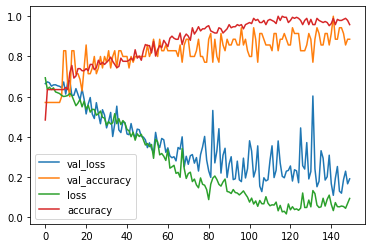

In [26]:
pd.DataFrame(history.history).plot()

In [27]:
score = model.evaluate(x_test, y_test)

26/26 [==============================] - 0s 2ms/step


In [28]:
score[1]

0.8846153616905212

In [30]:
predictions = model.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix
predictions = np.round(predictions) 
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y_test, predictions) 
confusion_mtx

array([[12,  1],
       [ 2, 11]], dtype=int64)

In [32]:
labels =["Yes","No"]

In [33]:
y_hat = model.predict(x_test)

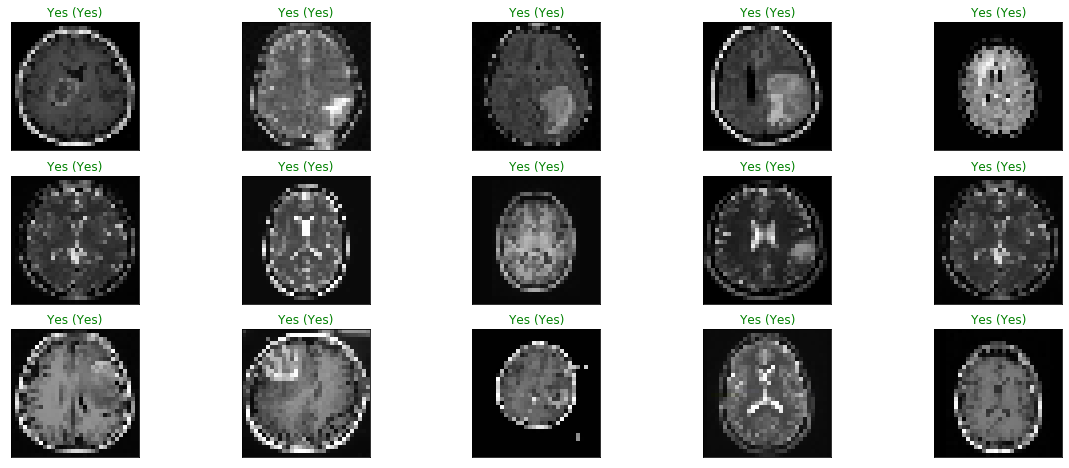

In [34]:
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()
